# COVID-19 in Kentucky

## Description
This dataset, provided by the CDC Case Task Force, contains COVID-19 cases and deaths by state. Updated twice daily, it presents both probable and confirmed cases and deaths as reported by public health jurisidictions. These provisional counts are subject to change as the data are adjusted over time, and because of this negative numbers can occur. Probable cases in particular can fluctuate greatly as they are reclassified to confirmed cases or are determined to be something other than COVID.

60 public health jurisdictions report COVID cases to the CDC: the 50 states, the District of Columbia, New York City, the U.S. territories of American Samoa, Guam, the Commonwealth of the Northern Mariana Islands, Puerto Rico, and the U.S Virgin Islands as well as the Federated States of Micronesia, Republic of the Marshall Islands, and Republic of Palau. New York State does NOT include New York City's data, as they report separately to the CDC.

Source: Centers for Disease Control and Prevention, COVID-19 Response. COVID-19 Case Surveillance Public Data Access, Summary, and Limitations,
        accessed on ‎Monday, ‎July ‎26, ‎2021, at https://data.cdc.gov/Case-Surveillance/United-States-COVID-19-Cases-and-Deaths-by-State-o/9mfq-cb36

The data are through July of 2021.

## The Dataset
Number of Rows | Number of Columns | One Row Represents
------------- | ------------- | -------------
33,060 | 15 | One day for a jurisdiction

Columns  | Description | Data Type
------------- | ------------- | -------------
submission_date  | Date of counts  | Floating Timestamp
state  | Jurisdiction  | Text
tot_cases  | Total number of cases  | Number
conf_cases  | Total confirmed cases  | Number
prob_cases  | Total probable cases  | Number
new_case  | Number of new cases  | Number
pnew_case  | Number of new probable cases  | Number
tot_death  | Total number of deaths  | Number
conf_death  | Total number of confirmed cases  | Number
prob_death  | Total number of probable deaths  | Number
new_death  | Number of new deaths  | Number
pnew_death  | Number of new probable deaths  | Number
created_at  | Date and time record was created  | Floating Timestamp
consent_cases  | If Agree, then confirmed and probable cases are included. If Not Agree, then only total cases are included | Text
consent_deaths  | If Agree, then confirmed and probable deaths are included. If Not Agree, then only total deaths are included  | Text

## Objective
This notebook will focus on exploratory data analysis of the data. EDA focuses on summarizing data and gaining insight rather than formal statistical modeling, although statistical modelling can be used. Through this, we seek to understand the data and begin to formulate hypotheses for more quantitative statistical analyses. We will focus only on the data for Kentucky.

## Libraries
This analysis will use the python libraries pandas, numpy, matplotlib, and scikit-learn.

In [ ]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as skl

## Summarizing the Data

### Reading in the Data

In [ ]:
# Read in the Excel file
df = pd.read_excel("Datasets/casesanddeathsbystate.xlsx", engine = "openpyxl") # Uses openpyxl, xlrd no longer supports .xlsx files

### First Look
First, we will get a quick summary look at the data.

In [ ]:
display(df.head(5)) # First rows in the data start on January 22nd of 2020, where no cases or deaths were reported
display(df.tail(5))

In [ ]:
df.describe()
df.dtypes

We will use the submission_date field as the index for the DataFrame. This allows us to easily group the data by day, month, or year.

In [ ]:
df.index = df["submission_date"]
df.index

In [103]:
dfGroupedMonthYearState = df.groupby(by = [df["state"], df.index.month, df.index.year]).sum() # Group by state, month, year, and sum the results
dfGroupedMonthYearState.index.names = ["state", "month", "year"] # Rename the indices, as they can't be reset if they match an already existing column
dfGroupedMonthYearState = dfGroupedMonthYearState.reset_index() # Resets the indices to the default. Gives us state, month, and year as 3 new columns
dfGroupedMonthYearState.head(10)

,state,month,year,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death
0,AK,1,2020,0,0.0,0.0,0,0.0,0,0.0,0.0,0,0.0
1,AK,1,2021,1547357,0.0,0.0,6991,0.0,9301,0.0,0.0,27,0.0
2,AK,2,2020,0,0.0,0.0,0,0.0,0,0.0,0.0,0,0.0
3,AK,2,2021,1529870,0.0,0.0,3569,0.0,8788,0.0,0.0,15,0.0
4,AK,3,2020,793,0.0,0.0,128,0.0,36,0.0,0.0,6,0.0
5,AK,3,2021,1810250,0.0,0.0,4207,0.0,10287,0.0,0.0,17,0.0
6,AK,4,2020,8290,0.0,0.0,227,0.0,251,0.0,0.0,3,0.0
7,AK,4,2021,1894334,0.0,0.0,4871,0.0,10223,0.0,0.0,1,0.0
8,AK,5,2020,12268,0.0,0.0,108,0.0,331,0.0,0.0,4,0.0
9,AK,5,2021,2067016,0.0,0.0,2072,0.0,10929,0.0,0.0,21,0.0


In [107]:
# Filter to include only Kentucky, and filter further to include only new cases and deaths, potential and confirmed. Sort by date and create new columns for a cumulative bar graph
dfKy = dfGroupedMonthYearState[dfGroupedMonthYearState["state"] == "KY"]
dfKy = dfKy.filter(items = ["state", "month", "year", "new_case", "pnew_case", "new_death", "pnew_death"])
dfKy["month_year"] = dfKy["month"].astype(str) + "/" + dfKy["year"].astype(str)
dfKy["month_year"] = pd.to_datetime(dfKy["month_year"])
dfKy = dfKy.sort_values(by = ["month_year"])

new_cols = ['total_new_case', 'total_pnew_case', 'total_new_death', 'total_pnew_death']
for col in new_cols:
    dfKy[col] = dfKy['new_case'].cumsum()
    dfKy[col] = dfKy['pnew_case'].cumsum()
    dfKy[col] = dfKy['new_death'].cumsum()
    dfKy[col] = dfKy['pnew_death'].cumsum()
dfKy['prev_new_case'] = dfKy['new_case'].cumsum() - dfKy["new_case"]

dfKy.head(20)

,state,month,year,new_case,pnew_case,new_death,pnew_death,month_year,total_new_case,total_pnew_case,total_new_death,total_pnew_death,prev_new_case
380,KY,1,2020,0,0.0,0,0.0,2020-01-01,0.0,0.0,0.0,0.0,0
382,KY,2,2020,0,0.0,0,0.0,2020-02-01,0.0,0.0,0.0,0.0,0
384,KY,3,2020,843,21.0,29,2.0,2020-03-01,2.0,2.0,2.0,2.0,0
386,KY,4,2020,4206,40.0,242,7.0,2020-04-01,9.0,9.0,9.0,9.0,843
388,KY,5,2020,5427,188.0,239,10.0,2020-05-01,19.0,19.0,19.0,19.0,5049
390,KY,6,2020,6619,530.0,174,6.0,2020-06-01,25.0,25.0,25.0,25.0,10476
392,KY,7,2020,17392,1951.0,212,5.0,2020-07-01,30.0,30.0,30.0,30.0,17095
394,KY,8,2020,20435,3148.0,308,15.0,2020-08-01,45.0,45.0,45.0,45.0,34487
395,KY,9,2020,20612,4682.0,307,13.0,2020-09-01,58.0,58.0,58.0,58.0,54922
396,KY,10,2020,36953,7755.0,541,38.0,2020-10-01,96.0,96.0,96.0,96.0,75534


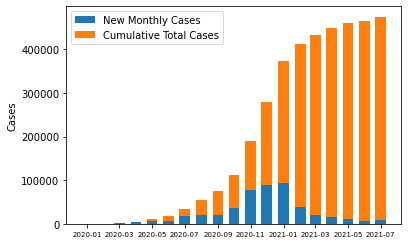

In [105]:
# Create cumulative bar graph displaying portion of new cases compared to overall cases per month
xLabels = dfKy["month_year"]
fig, ax = plt.subplots()

ax.bar(xLabels, dfKy["new_case"], width = 20, label = "New Monthly Cases")
ax.bar(xLabels, dfKy["prev_new_case"], width = 20, label = "Cumulative Total Cases", bottom = dfKy["new_case"])

ax.set_ylabel("Cases")
ax.legend()

plt.xticks(fontsize = 7)
plt.show()